In [2]:
from keras import Sequential
from keras.layers import *
from keras.preprocessing.image import *
from tensorflow.keras.optimizers import Adam
from keras.models import load_model


import numpy as np
import pathlib
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
BATCH_SIZE = 32
IMAGE_HEIGHT = 180
IMAGE_WIDTH = 180
EPOCHS = 8

In [ ]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/BrainTumorData/Traning Validation'
data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('*/*.jpg')))
print("Image Count: ",image_count)

In [ ]:
training_ds = image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
  batch_size=BATCH_SIZE)

In [5]:
training_ds.class_names

['normal', 'tumar']

In [ ]:
validation_ds = image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
  batch_size=BATCH_SIZE)

***Improve the I/O performance by using cache() and prefetch() function***

In [7]:
AUTOTUNE = tf.data.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [8]:
model = Sequential([
  Rescaling(scale=1./255),
  Conv2D(32, 3, activation='relu'),
  MaxPooling2D(),
  Conv2D(32, 3, activation='relu'),
  MaxPooling2D(),
  Conv2D(32, 3, activation='relu'),
  MaxPooling2D(),
  Flatten(),
  Dense(255, activation='relu'),
  Dense(1, activation='sigmoid')
])

In [9]:
model.compile(Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(training_ds, validation_data=validation_ds, epochs=EPOCHS)

In [ ]:
model.summary()

In [23]:
model.save('/content/drive/MyDrive/Colab Notebooks/BrainTumorData/tumarClassifier.h5')

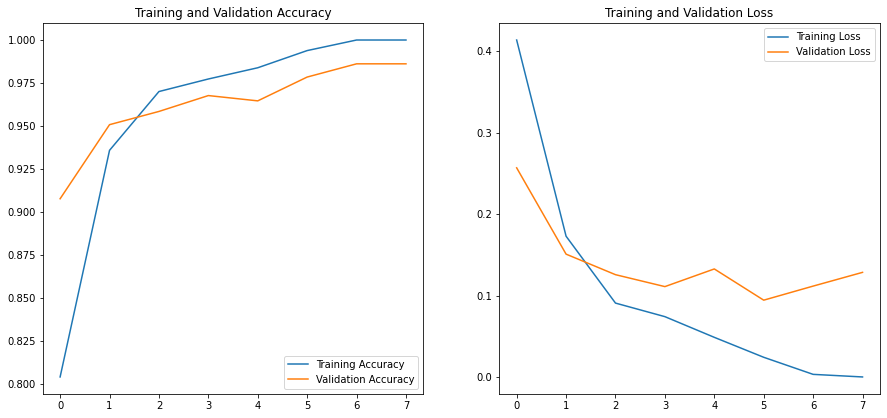

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Prediction**

In [3]:
model = load_model('/content/drive/MyDrive/Colab Notebooks/BrainTumorData/tumarClassifier.h5')

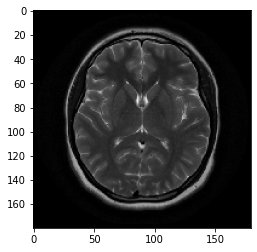

normal


In [15]:
img_path = "/content/drive/MyDrive/Colab Notebooks/BrainTumorData/Test/pred4.jpg"

img = load_img(img_path, target_size=(IMAGE_HEIGHT, IMAGE_WIDTH))
plt.imshow(img)
plt.show()

#convert image to array
img = img_to_array(img)
img = np.expand_dims(img, 0)

#call trained model to predict
pred = model.predict(img)
y = np.round(pred[0])
if y == 1:
  print('tumar')
else:
  print('normal')